In [6]:
from numpy import *
from numpy.random import rand, randn
from numpy.fft import fft, ifft
from numpy.lib.scimath import *
import numpy as np

In [ ]:
np.array([1, 2, 3])

In [5]:
array([1,2,3])

##this is a example when we could just type in array and see dont use numpy.array

array([1, 2, 3])

In [8]:
## from beta distribution 
np.random.beta(5,5, size = 3)


array([0.23201246, 0.48607397, 0.43890827])

In [9]:
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

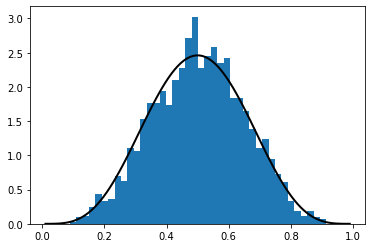

In [10]:
##the convention, also an abbreviation form
fig, ax = plt.subplots()

ax.hist(obs, bins=40, density=True)

ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()


In [19]:
##cdf 
q.cdf(0.4)

##quantile (inverse cdf) function
q.ppf(0.8) #thisis the 

#mean 
q.mean()


0.5

In [20]:
from scipy.stats import linregress

##scipy linear regression

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)

##why five parameters are defined here/
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9937370516699022, -0.0103267218309284)

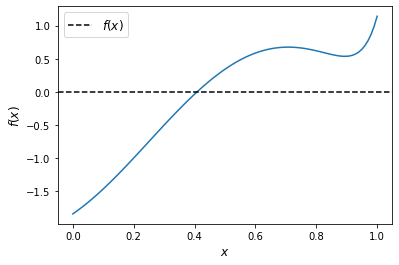

In [21]:
##lambda function (no need to write define function)
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1

x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls='--', c='k', label='$f(x)$')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [22]:
#an algo to find root

def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle
            lower, upper = lower, middle
        else:               # root is between middle and upper
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [23]:

bisect(f, 0, 1)

0.408294677734375

In [27]:
from scipy.optimize import newton
newton(f, 0.2)

0.40829350427935673

In [28]:
from scipy.optimize import fixed_point
fixed_point(lambda x: x**2, 10.0) 

array(1.)

In [29]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]


0.0

In [30]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

In [32]:
#textbook answers
def bisect(f, left, right, tol=10e-5):
    #base condition (or actually the last condition to satisfy)
    if right - left < tol:
        return (right + left) * 0.5
    else:
        middle = 0.5 * (left + right)
        if f(middle) > 0:
            return bisect(f, left, middle)
        else: 
            return bisect(f, middle, upper)

In [33]:
#my way
def my_bisect(f, left, right, tol=10e-5):
    if right - left < tol:
        return (right + left) * 0.5
    middle =(left + right)/2
    if f(middle) * f(left) < 0:
        return my_bisect(f, left, middle)
    elif f(middle) * f(right) < 0:
        return my_bisect(f, middle, right)
    elif f(middle) == 0:
        return middle
    
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
my_bisect(f, 0, 1)

0.408294677734375